In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from tools import utils, amputation
from alternative_imputers import muzellec_imputers
from tools.utils import colors
from tqdm import tqdm

plt.style.use(utils.plot_style)

from imputation_on_data import run_imputer

In [2]:
n_impute = 1
datasets = ['iris', 'diabetes', 'real']
p_miss = [0.10]#, 0.40, 0.7]
modes = ['mae']#, 'bayesianRidge'],
mechas = ['MCAR']#, 'MAR', 'MNAR']
imputer_names = ['mf', 'mean', 'ice', 'knn']#, 'mice_r']

params_grid = np.array(np.meshgrid(n_impute, datasets, p_miss, mechas, imputer_names, modes)).T.reshape(-1,6)
params_grid = np.vstack((np.arange(params_grid.shape[0]), params_grid.T)).T

results = []
for param in tqdm(params_grid): ## tqdm -- progress bar
    result = run_imputer(param)
    results.append(result)

 67%|██████▋   | 8/12 [00:07<00:04,  1.13s/it]

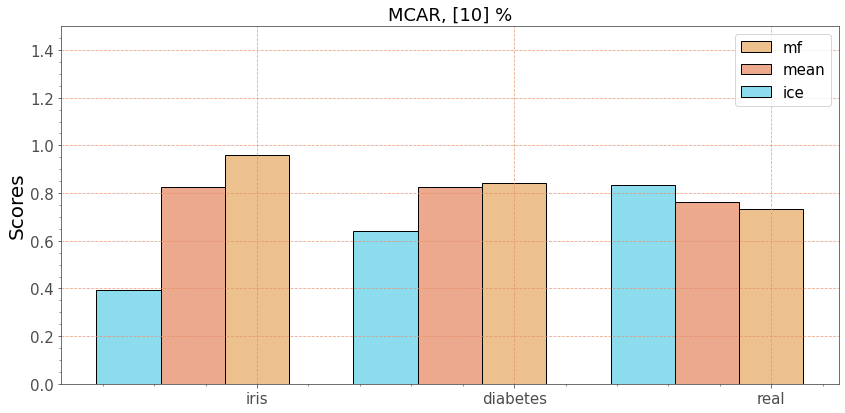

In [ ]:
# mode_f = 'bayesianRidge'#'mae'

for mode_f in modes:
    for mech_f in mechas:
        fig, ax = plt.subplots()
        for idx_miss, p_miss_f in enumerate(p_miss):

            # определяем переменные из params_grid (пр. строка)
            subgroup = lambda idx, imp_meth: (params_grid[idx][-3] == mech_f) and (float(params_grid[idx][-4]) == p_miss_f) and (params_grid[idx][-2] == imp_meth) and (params_grid[idx][-1] == mode_f)

            means = [res[1] for res in results]
            stds = [res[2] for res in results]
            labels = imputer_names

            means_s = []
            std_s = []
            imp_meth_s = []

            for imp_meth in imputer_names:
                means_s.append([mean for idx, mean in enumerate(means) if subgroup(idx, imp_meth)])
                std_s.append([std for idx, std in enumerate(stds) if subgroup(idx, imp_meth)])
                imp_meth_s.append([params_grid[idx][-1] for idx, mean in enumerate(means) if subgroup(idx, imp_meth)])

            x = np.arange(len(datasets))  # the label locations
            width = 0.25  # the width of the bars

            
            rects = []
            for idx, mean_i, std_i in zip(range(len(std_s)), means_s, std_s):
                rects.append(ax.bar(x - width * idx, mean_i, width, yerr = std_i, label=labels[idx_miss], capsize=5, alpha=np.linspace(1, 0.2, len(p_miss))[idx_miss], color = colors[idx], edgecolor='black'))

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Scores')
            ax.set_title(f"{mech_f}, {(np.array(p_miss) * 100).astype(int)} %")
            ax.set_xticks(x)
            ax.set_ylim(0, 1.5)
            ax.set_xticklabels(datasets)
            ax.legend(imputer_names)
            ax.set_ylim(0)
            # for rect in rects:
            #     ax.bar_label(rect, padding=3)

fig.tight_layout()
#plt.savefig(f"figures/{mech_f}, {p_miss_f*100} %, mode: {mode_f}.png", dpi=200)
plt.show()